# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [12]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/grandpoobah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
api_key

'8df742aa8080432fa6535b83070a3175'

In [14]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [15]:
# Fetch the Bitcoin news articles
blockchain_news_en = newsapi.get_everything(
    q="blockchain",
    language="en"
)

# Show the total number of news
blockchain_news_en["totalResults"]

5341

In [16]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

1828

In [17]:
# Create the Bitcoin sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [18]:
# Create a DataFrame with the news in English
blockchain_en_df = create_df(blockchain_news_en["articles"], "en")

In [19]:
# Show the head articles (they are in English)
blockchain_en_df.head()

,title,description,text,date,language
0,China’s national blockchain network embraces g...,While China bans cryptocurrency exchanges and ...,While China bans cryptocurrency exchanges and ...,2021-02-04,en
1,Learn all about Blockchain technology with thi...,TL;DR: The Blockchain Certification Advanced T...,TL;DR: The Blockchain Certification Advanced T...,2021-02-25,en
2,Coinbase files to go public in a key listing f...,"This morning Coinbase, an American cryptocurre...","This morning Coinbase, an American cryptocurre...",2021-02-25,en
3,Crypto company Anchorage raises $80 million af...,Anchorage has raised an $80 million Series C f...,Anchorage has raised an $80 million Series C f...,2021-02-25,en
4,Covantis agribusiness alliance launches blockc...,"Covantis, an alliance of global agribusinesses...",By Reuters Staff\r\nPARIS (Reuters) - Covantis...,2021-02-25,en


In [20]:
# Create the Ethereum sentiment scores DataFrame
ethereum_en_df = create_df(ethereum_news_en["articles"], "en")

In [21]:
# Show the head articles (they are in English)
ethereum_en_df.head()

,title,description,text,date,language
0,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,en
1,Ethereum scales record peak before futures lau...,Ethereum hit an all-time high on Thursday as i...,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,en
2,Cryptocurrency Ethereum hits record high ahead...,"Ethereum hit all-time highs on Wednesday, brea...",By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,en
3,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,en
4,Remastered 'nyan cat' art sells for the equiva...,While the first Christie's auction of digital ...,While the first Christie's auction of digital ...,2021-02-20,en


In [22]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

In [24]:

# Describe the Bitcoin Sentiment
# Get sentiment for the text and the title
for index, row in blockchain_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

In [25]:
# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
blockchain_en_df = blockchain_en_df.join(title_sentiment_df).join(text_sentiment_df)

blockchain_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,China’s national blockchain network embraces g...,While China bans cryptocurrency exchanges and ...,While China bans cryptocurrency exchanges and ...,2021-02-04,en,0.0,0.0,1.0,0.0,0,0.0000,0.000,1.000,0.0,0
1,Learn all about Blockchain technology with thi...,TL;DR: The Blockchain Certification Advanced T...,TL;DR: The Blockchain Certification Advanced T...,2021-02-25,en,0.0,0.0,1.0,0.0,0,0.2500,0.054,0.946,0.0,1
2,Coinbase files to go public in a key listing f...,"This morning Coinbase, an American cryptocurre...","This morning Coinbase, an American cryptocurre...",2021-02-25,en,0.0,0.0,1.0,0.0,0,0.4404,0.088,0.912,0.0,1
3,Crypto company Anchorage raises $80 million af...,Anchorage has raised an $80 million Series C f...,Anchorage has raised an $80 million Series C f...,2021-02-25,en,0.0,0.0,1.0,0.0,0,0.4939,0.094,0.906,0.0,1
4,Covantis agribusiness alliance launches blockc...,"Covantis, an alliance of global agribusinesses...",By Reuters Staff\r\nPARIS (Reuters) - Covantis...,2021-02-25,en,0.0,0.0,1.0,0.0,0,0.1280,0.049,0.951,0.0,1


<AxesSubplot:title={'center':'Blockchain Title and Text Sentiment Comparisson'}>

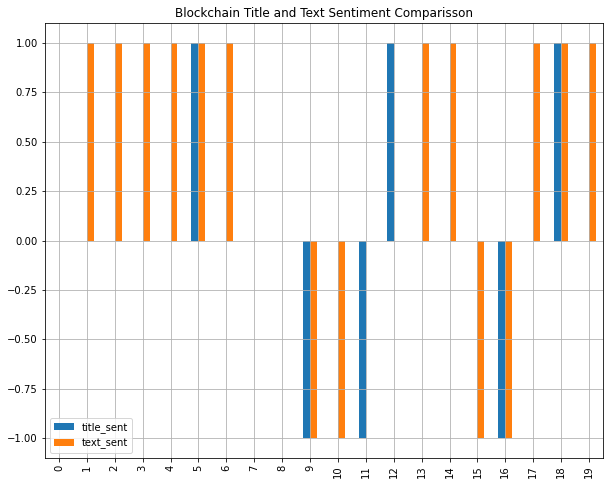

In [26]:
# Plot bar chart
blockchain_en_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Blockchain Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [27]:
# Describe dataframe
blockchain_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.009925,0.035100,0.925900,0.039000,0.000000,0.191790,0.074900,0.895000,0.030050,0.350000
std,0.241657,0.092344,0.122005,0.096123,0.561951,0.407948,0.081023,0.093059,0.052451,0.812728
min,-0.421500,0.000000,0.649000,0.000000,-1.000000,-0.659700,0.000000,0.667000,0.000000,-1.000000
25%,0.000000,0.000000,0.839750,0.000000,0.000000,0.000000,0.000000,0.852000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.189000,0.053500,0.912000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.453775,0.089500,0.955750,0.062000,1.000000
max,0.659700,0.351000,1.000000,0.306000,1.000000,0.910000,0.284000,1.000000,0.157000,1.000000


In [28]:
# Describe the Ethereum Sentiment
# Get sentiment for the text and the title
for index, row in ethereum_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

In [17]:
# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_en_df = ethereum_en_df.join(title_sentiment_df).join(text_sentiment_df)

ethereum_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Coinbase is going public via direct listing,Coinbase plans to go public by way of a direct...,Coinbase plans to go public by way of a direct...,2021-01-28,en,0.0000,0.000,1.000,0.0,0,0.0000,0.0,1.000,0.000,0
1,Ethereum scales record peak before futures lau...,Ethereum hit an all-time high on Thursday as i...,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,en,0.0000,0.000,1.000,0.0,0,0.0000,0.0,1.000,0.000,0
2,Cryptocurrency Ethereum hits record high ahead...,"Ethereum hit all-time highs on Wednesday, brea...",By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,en,0.0000,0.000,1.000,0.0,0,0.0000,0.0,1.000,0.000,0
3,"Elon Musk, back on Twitter, turns his support ...",Cryptocurrency Dogecoin surged more than 50% o...,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,en,0.4767,0.279,0.721,0.0,1,-0.3818,0.0,0.923,0.077,-1
4,A crypto CEO breaks down why he would not be s...,Summary List PlacementCryptocurrencies stole h...,Cryptocurrencies stole headlines on the first ...,2021-01-05,en,0.0000,0.000,1.000,0.0,0,0.0000,0.0,1.000,0.000,0


<AxesSubplot:title={'center':'Ethereum Title and Text Sentiment Comparisson'}>

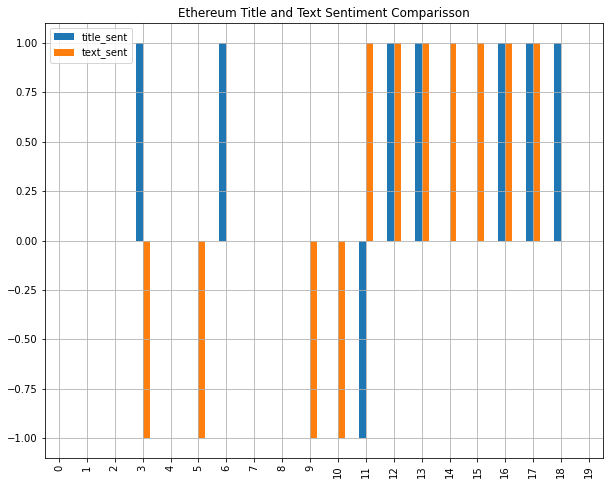

In [18]:
# Plot bar chart
ethereum_en_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Ethereum Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [19]:
# Describe dataframe
ethereum_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,0.131620,0.10125,0.885500,0.013250,0.300000,0.122665,0.048450,0.935700,0.015850,0.15000
std,0.283818,0.14999,0.152262,0.059256,0.571241,0.346345,0.068156,0.071916,0.032921,0.74516
min,-0.557400,0.00000,0.567000,0.000000,-1.000000,-0.381800,0.000000,0.773000,0.000000,-1.00000
25%,0.000000,0.00000,0.734750,0.000000,0.000000,0.000000,0.000000,0.892750,0.000000,0.00000
50%,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.933000,0.000000,0.00000
75%,0.355475,0.22625,1.000000,0.000000,1.000000,0.340000,0.073000,1.000000,0.000000,1.00000
max,0.726900,0.43300,1.000000,0.265000,1.000000,0.831600,0.227000,1.000000,0.098000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: BITCOIN had the highest mean positive score.

Q: Which coin had the highest compound score?

A: BITCOIN again had the highest compound score.

Q. Which coin had the highest positive score?

A: ETHEREUM thad the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
# Complete the tokenizer function
def process_text(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    sw_addon = {'by', 'reuters', 'staff','photo'}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', blockchain_en_article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    second_output = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    return second_output

In [23]:
# Define the counter function
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [79]:
# Create a new tokens column for Bitcoin

ids = blockchain_en_df.index.tolist()

blockchain_en_article = blockchain_en_df["text"][1]
print(blockchain_en_article)

TL;DR: The Ultimate FinTech and Blockchain Bootcamp Bundle is on sale for £29.39 as of Jan. 10, saving you 97% on list price.
Financial technology fintech is shaping the future of finance and bankin… [+1051 chars]


In [80]:
blockchain_processed = process_text(blockchain_en_article)
print(blockchain_processed)

['tldr', 'ultimate', 'fintech', 'blockchain', 'bootcamp', 'bundle', 'sale', 'jan', 'saving', 'list', 'pricefinancial', 'technology', 'fintech', 'shaping', 'future', 'finance', 'bankin', 'chars']


In [81]:
# Create a new tokens column for Ethereum
ids = ethereum_en_df.index.tolist()

ethereum_en_article = ethereum_en_df["text"][1]
print(ethereum_en_article)

FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
TOKYO (Reuters) - E… [+472 chars]


In [38]:
ethereum_processed = process_text(ethereum_en_article)
print(ethereum_processed)

['tldr', 'ultimate', 'fintech', 'blockchain', 'bootcamp', 'bundle', 'sale', 'jan', 'saving', 'list', 'pricefinancial', 'technology', 'fintech', 'shaping', 'future', 'finance', 'bankin', 'chars']


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [32]:
from collections import Counter
from nltk import ngrams

In [42]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram_counts = Counter(ngrams(blockchain_processed, n=2))
print(dict(bitcoin_bigram_counts))

{('tldr', 'ultimate'): 1, ('ultimate', 'fintech'): 1, ('fintech', 'blockchain'): 1, ('blockchain', 'bootcamp'): 1, ('bootcamp', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'jan'): 1, ('jan', 'saving'): 1, ('saving', 'list'): 1, ('list', 'pricefinancial'): 1, ('pricefinancial', 'technology'): 1, ('technology', 'fintech'): 1, ('fintech', 'shaping'): 1, ('shaping', 'future'): 1, ('future', 'finance'): 1, ('finance', 'bankin'): 1, ('bankin', 'chars'): 1}


In [43]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram_counts = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_bigram_counts))

{('tldr', 'ultimate'): 1, ('ultimate', 'fintech'): 1, ('fintech', 'blockchain'): 1, ('blockchain', 'bootcamp'): 1, ('bootcamp', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'jan'): 1, ('jan', 'saving'): 1, ('saving', 'list'): 1, ('list', 'pricefinancial'): 1, ('pricefinancial', 'technology'): 1, ('technology', 'fintech'): 1, ('fintech', 'shaping'): 1, ('shaping', 'future'): 1, ('future', 'finance'): 1, ('finance', 'bankin'): 1, ('bankin', 'chars'): 1}


In [56]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_token = token_count(bitcoin_bigram_counts)
bitcoin_token

[(('tldr', 'ultimate'), 1),
 (('ultimate', 'fintech'), 1),
 (('fintech', 'blockchain'), 1)]

In [62]:
# Use token_count to get the top 10 words for Ethereum
ethereum_token = token_count(ethereum_bigram_counts)
ethereum_token

[(('tldr', 'ultimate'), 1),
 (('ultimate', 'fintech'), 1),
 (('fintech', 'blockchain'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

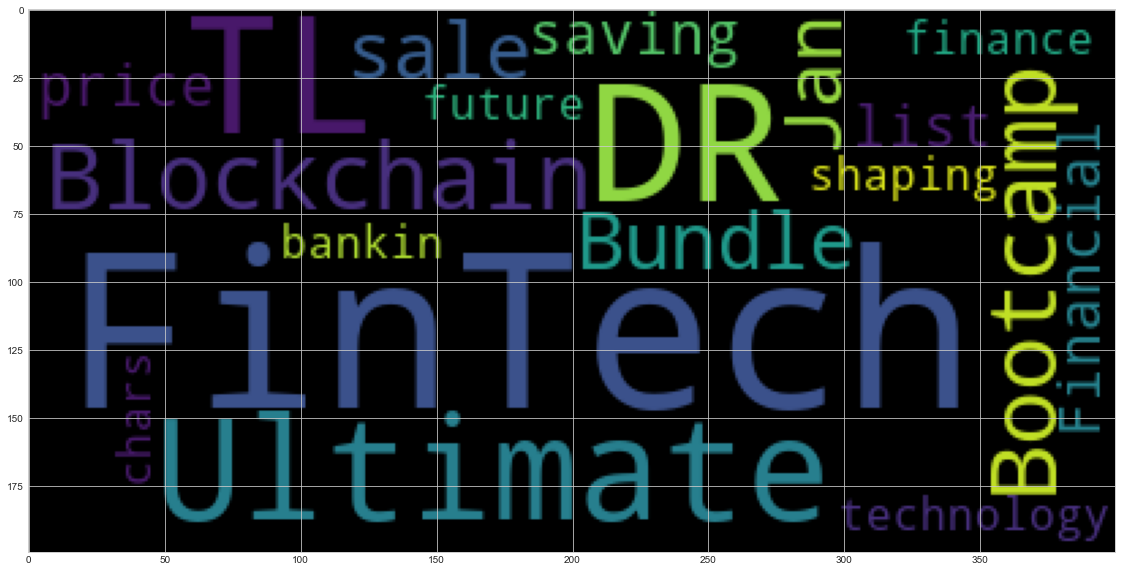

In [68]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(blockchain_en_article)
plt.imshow(bitcoin_wc)

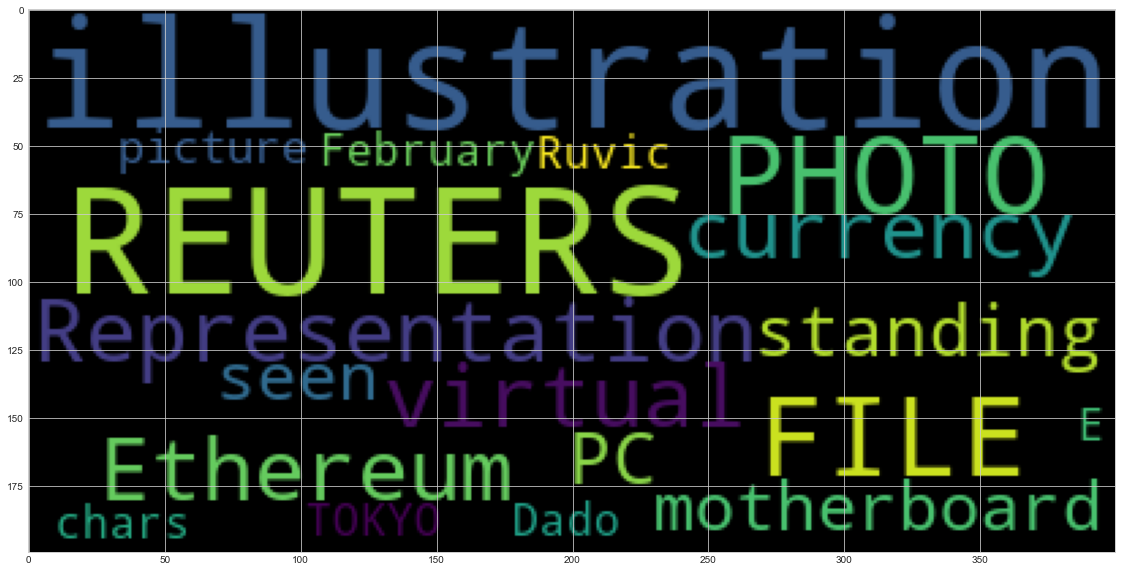

In [69]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_en_article)
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [83]:
import spacy
from spacy import displacy

In [84]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [85]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(blockchain_en_article)

In [86]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [89]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents if ent.label_ == 'ORG'])

['The Ultimate FinTech', 'Blockchain Bootcamp Bundle', 'fintech']


In [90]:
print([ent.text for ent in bitcoin_doc.ents if ent.label_ == 'MONEY'])

['29.39']


In [91]:
print([ent.text for ent in bitcoin_doc.ents if ent.label_ == 'DATE'])

['Jan. 10']


---

### Ethereum NER

In [93]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_en_article)

In [94]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [96]:
# List all Entities
print([ent.text for ent in ethereum_doc.ents if ent.label_ == 'ORG'])

['REUTERS/Dado Ruvic/Illustration', 'Reuters']


In [97]:
# List all Entities
print([ent.text for ent in ethereum_doc.ents if ent.label_ == 'DATE'])

['February 3, 2018']


---